In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target  # 0 = malignant, 1 = benign

print("Features:", X.columns.tolist())
print("Classes:", data.target_names)


Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Classes: ['malignant' 'benign']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Confusion Matrix:
 [[41  1]
 [ 1 71]]
Precision: 0.99
Recall:    0.99
ROC-AUC:   1.00


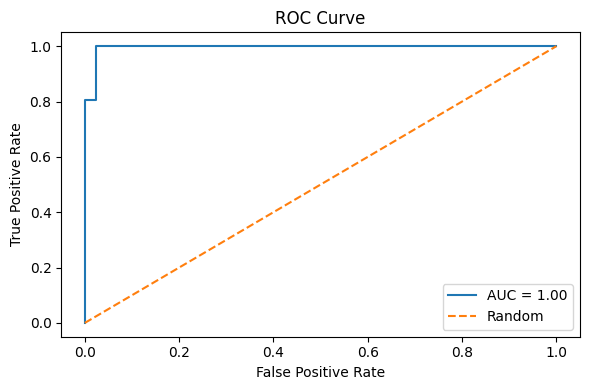

In [6]:
# 4. Evaluate with confusion matrix, precision, recall, ROC-AUC
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt

# Predict labels and probabilities
y_pred    = clf.predict(X_test_scaled)
y_proba   = clf.predict_proba(X_test_scaled)[:, 1]

# Metrics
cm   = confusion_matrix(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", cm)
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"ROC-AUC:   {auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1],[0,1],'--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# 5. Tune threshold and explain sigmoid function
import numpy as np
from sklearn.metrics import accuracy_score

# Try a custom threshold (e.g., 0.3)
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

acc_thresh = accuracy_score(y_test, y_pred_thresh)
prec_thresh = precision_score(y_test, y_pred_thresh)
rec_thresh = recall_score(y_test, y_pred_thresh)

print(f"Metrics at threshold {threshold}:")
print(f"  Accuracy:  {acc_thresh:.2f}")
print(f"  Precision: {prec_thresh:.2f}")
print(f"  Recall:    {rec_thresh:.2f}")


Metrics at threshold 0.3:
  Accuracy:  0.98
  Precision: 0.97
  Recall:    1.00
